# "Uncovering Insights: Exploratory Data Analysis of Myntra Dataset"

Myntra is a one-stop shop for all your fashion and lifestyle needs. Being India's largest e-commerce store for fashion and lifestyle products, Myntra aims at providing a hassle-free and enjoyable shopping experience to shoppers across the country with the widest range of brands and products on its portal. The brand is making a conscious effort to bring the power of fashion to shoppers with an array of the latest and trendiest products available in the country.

Data Source : https://www.kaggle.com/datasets/ronakbokaria/myntra-products-dataset

This dataset holds 1060213 (1060k) records. It is a product listing from Myntra.com till the period 04th May 2023.

### Problem Statement

The problem statement in this analysis can be defined as understanding and exploring the key factors and relationships within a dataset containing information about products, sellers, ratings, prices, and discounts. 

### Objective

The objective is to gain insights into various aspects of the dataset, such as the distribution of product ratings, price variations, correlations between different variables, and the impact of ratings on discounts. The analysis aims to provide meaningful insights and suggestions for decision-making, such as identifying areas for improvement, optimizing pricing strategies, and understanding customer preferences.

# 1. Import required Libraries here

In [1]:
# import pandas
import pandas as pd

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 2. Reading the csv file

In [2]:
df = pd.read_csv('myntra202305041052.csv')

### About the dataset 

- name: Name or description of the product.
- img: URL or path to the image of the product.
- asin: ASIN Standard Identification Number of the product. 
- price: Price of the product. 
- mrp: Maximum Retail Price (MRP) of the product.
- rating: Rating of the product, on a scale of 0 to 5.
- ratingTotal: Total number of ratings received by the product.
- discount: Discount percentage offered on the product.
- seller: Name of the seller or brand of the product.
- purl: URL or link to the product on the e-commerce website.

# 3. Data Quality Assessment

#### 3.1 Fetching first 5 rows from the dataset

In [3]:
df.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,5300,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...


#### 3.2 Getting the shape of the dataset that is number of rows and columns

In [4]:
df.shape

(1060213, 11)

#### 3.3 Getting the info of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060213 entries, 0 to 1060212
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1060213 non-null  int64  
 1   name         1060213 non-null  object 
 2   img          1060213 non-null  object 
 3   asin         1060213 non-null  object 
 4   price        1060213 non-null  float64
 5   mrp          1060213 non-null  float64
 6   rating       1060213 non-null  float64
 7   ratingTotal  1060213 non-null  int64  
 8   discount     1060213 non-null  int64  
 9   seller       1060213 non-null  object 
 10  purl         1060213 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 89.0+ MB


### Observations

- **NULL VALUES** : We do not see any null values in our data
- **CONSISTENCY** : The data is in consistent format.
- **DATA TYPE** : `seller` is actually a categorical column. It will reduce the space required and will be easy while doing the analysis. 

#### 3.4 MISSING VALUES

In [6]:
df.isnull().sum()

id             0
name           0
img            0
asin           0
price          0
mrp            0
rating         0
ratingTotal    0
discount       0
seller         0
purl           0
dtype: int64

There are no missing values!

#### 3.5 DUPLICATES

In [7]:
df.duplicated().sum()

0

**Observation** - Data does not have any duplicates!

# 4. Checking for consistency and validity

In [8]:
df['seller'].nunique()

5496

There are 5,496 sellers at Myntra

In [9]:
df['id'].nunique()

1060213

There are 10,60,213 IDs in our dataset.

In [10]:
df['asin'].unique()

array(['-'], dtype=object)

In [11]:
df['rating'].unique()

array([4.1, 4.2, 4.5, 4. , 3.9, 4.6, 4.3, 4.8, 4.4, 0. , 5. , 4.7, 3.8,
       4.9, 3.7, 3.5, 3.6, 2.4, 3.2, 3.4, 2.6, 2.7, 3. , 3.3, 2.8, 3.1,
       1. , 1.8, 2.5, 2.3, 2. , 2.2, 1.7, 2.1, 2.9, 1.5, 1.3, 1.9, 1.6,
       1.4, 1.2, 1.1])

In [12]:
df['discount'].unique()

array([  59,   45,   54, ..., 1253, 4440, 6401], dtype=int64)

### Observations

- We can change the data type of `seller` and add them into category 
- We can drop the `image` and `product url` and `id` column and since there is no values for the `asin` column, we can drop that too
- There is discrepancy in the column `discount` since 6401 can not be a discount number and we have to ensure that the column has the maximum value of 100. So we will replace the discount values that are above 100 with the mean of all the discounts below 100. This approach allows you to retain the rows and preserve the information they contain, while adjusting the invalid values to be within a valid range.

# 5. DATA CLEANING 

In [3]:
#SELLER 

df['seller'] = df['seller'].astype('category')

In [4]:
#DROPPING THE UNWANTED COLUMNS

df.drop(['asin','img','purl','id'],axis=1,inplace = True)

In [5]:
#DISCOUNT 

mean_discount_below_100 = df[df['discount'] <= 100]['discount'].mean()
mean_discount_below_100

39.30210392689269

In [6]:
df.loc[df['discount'] > 100, 'discount'] = mean_discount_below_100

## Questions to answer 

1. Top 5 seller who has the most products 
2. Top 5 products with highest ratings 
3. What is the average rating of products in the dataset?
4. Is there any correlationship between the total ratings and the ratings for the product 
5. What is the distribution of the product ratings?
6. How does the price vary across different products?
7. What is the average discount offered by each seller? 
8. Are there any correlations between price, rating, and discount?
9. How does the price compare to the MRP (Maximum Retail Price)?
10.How does the rating of a product affect the discount percentage offered?
11. How is the distribution of discount column?

# 6. EXPLORATORY DATA ANALYSIS 

### 6.1 Top 5 seller who has the most products

In [17]:
seller_counts = df['seller'].value_counts()
seller_counts

Roadster                 10651
H&M                       6667
Puma                      6579
max                       6486
Anouk                     6158
                         ...  
Keraglam Professional        1
Kedar Fab                    1
Signature Sole               1
YASWARA                      1
Little Kiki                  1
Name: seller, Length: 5496, dtype: int64

In [18]:
top_5_sellers = seller_counts.head()
top_5_sellers

Roadster    10651
H&M          6667
Puma         6579
max          6486
Anouk        6158
Name: seller, dtype: int64

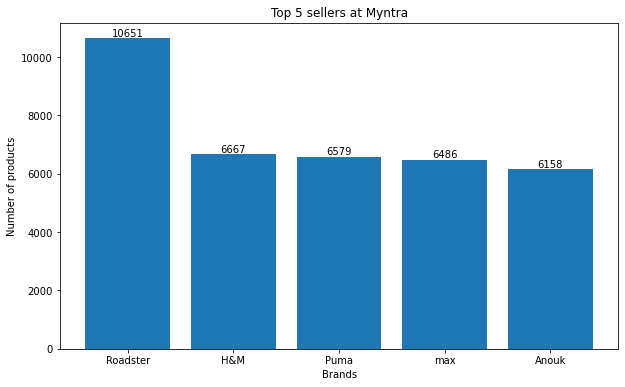

In [19]:
plt.figure(figsize=(10,6))
plt.bar(x = top_5_sellers.index,height= top_5_sellers)
plt.title('Top 5 sellers at Myntra')
plt.xlabel('Brands')
plt.ylabel('Number of products')
for i, v in enumerate(top_5_sellers):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

### 6.2 Top 5 products with highest ratings

In [20]:
# Assuming your DataFrame is named 'df'
highest_ratings = df.groupby('name')['ratingTotal'].max().nlargest(5)

In [21]:
highest_ratings

name
Toner-Lotion-Cream-Lip Balm              76400
Men Pack of 2 Printed T-shirt            75100
Unisex Skin Care Gift Set                72700
Pack Of 2 Printed T-shirts               72600
Pack Of 2 Printed Pure Cotton T-shirt    72500
Name: ratingTotal, dtype: int64

In [22]:
#we found a descripancy in the name column so we removed the values which are null 

df.drop(df[df['name'] == '-'].index, inplace=True)

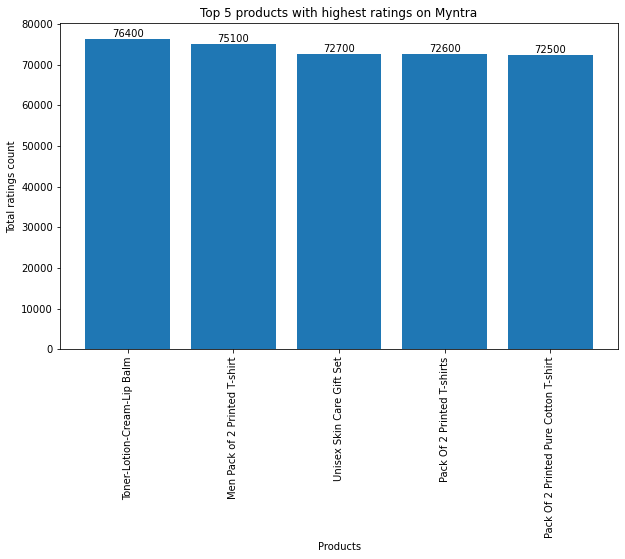

In [23]:
plt.figure(figsize=(10,6))
plt.bar(x =highest_ratings.index, height = highest_ratings)
plt.xticks(rotation=90)
plt.title('Top 5 products with highest ratings on Myntra')
plt.xlabel('Products')
plt.ylabel('Total ratings count')
for i, v in enumerate(highest_ratings):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

### 6.3 What is the average rating for sellers?

In [24]:
average_ratings = df.groupby('seller')['rating'].mean()

sorted_ratings = average_ratings.sort_values(ascending = False)

In [25]:
#checking the avearge rating of the top 10 sellers after sorting

top_10_sellers_with_highest_average_ratings = sorted_ratings.head(10)

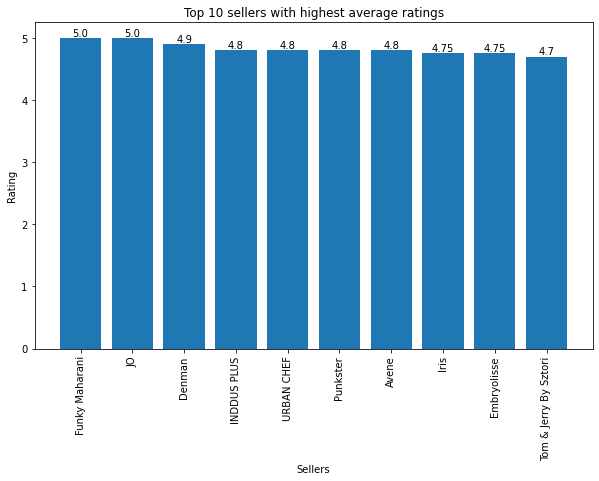

In [26]:
plt.figure(figsize=(10,6))
plt.bar(x = top_10_sellers_with_highest_average_ratings.index, height = top_10_sellers_with_highest_average_ratings)
plt.xticks(rotation=90)
plt.title('Top 10 sellers with highest average ratings')
plt.xlabel('Sellers')
plt.ylabel('Rating')
for i, v in enumerate(top_10_sellers_with_highest_average_ratings):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

### 6.4 Is there any relationship between the total ratings and the ratings for the product?

In [12]:
correlation_coefficient = df['ratingTotal'].corr(df['rating'])

print("Correlation Coefficient: {:.2f}".format(correlation_coefficient))

Correlation Coefficient: 0.10


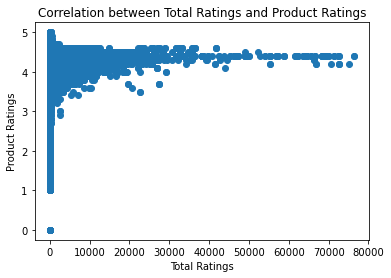

In [13]:
plt.scatter(df['ratingTotal'], df['rating'])
plt.title('Correlation between Total Ratings and Product Ratings')
plt.xlabel('Total Ratings')
plt.ylabel('Product Ratings')
plt.show()

The correlation coefficient of 0.10 indicates a relatively weak relationship, meaning that the relationship is not very strong or significant.

It's important to note that correlation does not imply causation. While there is a positive correlation between the total ratings and the product ratings, it does not necessarily mean that the total ratings directly cause or influence the product ratings. There may be other factors at play that contribute to the overall ratings of the products.

Therefore, based on the correlation coefficient of 0.10, we can infer that there is a weak positive relationship between the total ratings and the ratings for each product, but other factors may have a more significant impact on the product ratings.

### 6.5 What is the distribution of the product ratings?

In [14]:
rating_mean = df['rating'].mean()
rating_median = df['rating'].median()
rating_mode = df['rating'].mode()
rating_std = df['rating'].std()
rating_min = df['rating'].min()
rating_max = df['rating'].max()

print("Mean Rating: ", rating_mean)
print("Median Rating: ", rating_median)
print("Mode Rating: ", rating_mode)
print("Standard Deviation of Ratings: ", rating_std)
print("Minimum Rating: ", rating_min)
print("Maximum Rating: ", rating_max)

Mean Rating:  1.0601497057669311
Median Rating:  0.0
Mode Rating:  0    0.0
dtype: float64
Standard Deviation of Ratings:  1.8296315775273873
Minimum Rating:  0.0
Maximum Rating:  5.0


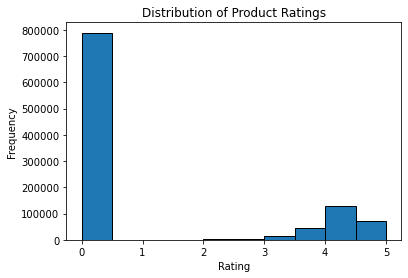

In [28]:
plt.hist(df['rating'], bins=10, edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')

plt.show()

### 6.6 How does the price vary across different products?

In [31]:
mean_price = np.mean(df['price'])
median_price = np.median(df['price'])
mode_price = df['price'].mode().values[0]


print('Mean:', mean_price)
print('Median:', median_price)
print('Mode:', mode_price)


Mean: 1536.235155341426
Median: 811.0
Mode: 599.0


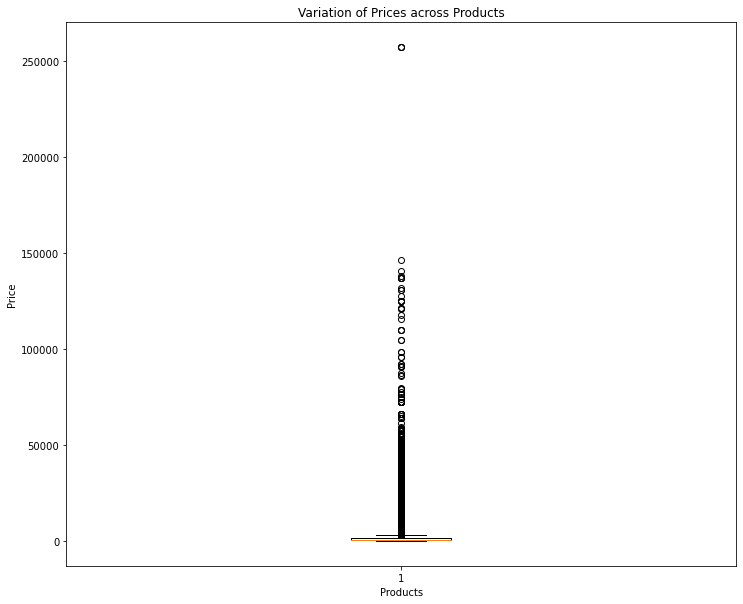

In [25]:
plt.figure(figsize=(12, 10))
plt.boxplot(df['price'])
plt.xlabel('Products')
plt.ylabel('Price')
plt.title('Variation of Prices across Products')
plt.show()

The distribution of product prices in the dataset exhibits a right-skewed pattern. This is evident from the statistical measures:

Mean: 1536.24

Median: 811.0

Mode: 599.0

The mean (average) price is higher than the median, indicating that the distribution is influenced by a few higher-priced products. The mode represents the most frequently occurring price in the dataset.

Additionally, the presence of outliers in the price data is suggested by the box plot, which shows values that lie significantly above the upper whisker. These outliers may correspond to products with exceptionally high prices.

Overall, this suggests that while the majority of products are priced around the median value, there is a subset of products with higher prices, contributing to the right-skewness and the presence of outliers in the price distribution

### 6.7 What is the average discount offered by each seller?

In [9]:
average_discounts = round(df.groupby('seller')['discount'].mean().sort_values(ascending=False),2)

In [10]:
df_average_discounts = pd.DataFrame({'Average Discount': average_discounts})

df_average_discounts.head(30)

,Average Discount
seller,
Kord Store,88.73
Little Kiki,87.00
CLEMIRA,87.00
TRENDY RABBIT,86.99
WM,86.64
White World,86.61
Silk Land,85.97
aadita,84.19
AMI,84.04


### 6.8 Are there any correlations between price, rating, and discount?

             price    rating  discount
price     1.000000 -0.101084 -0.200730
rating   -0.101084  1.000000  0.047831
discount -0.200730  0.047831  1.000000


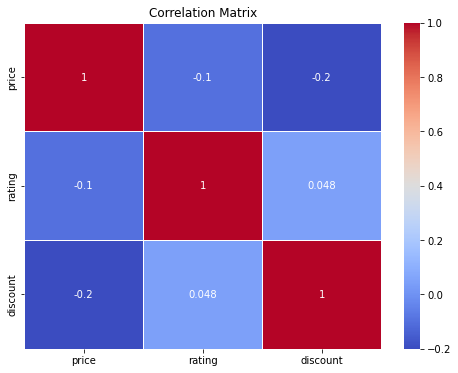

In [11]:
correlation_data = df[['price', 'rating', 'discount']]

correlation_matrix = correlation_data.corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In summary, the analysis shows that there is a slight tendency for higher-priced products to have lower ratings, while higher-priced products also tend to have larger discounts. However, the correlations are relatively weak, indicating that other factors may play a more influential role in determining the rating, price, and discount of products.

### 6.9 How does the price compare to the MRP (Maximum Retail Price)?

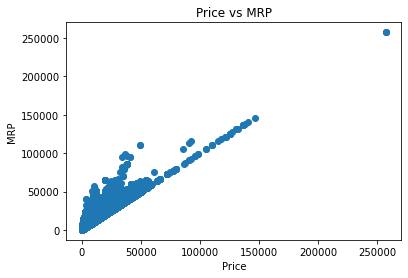

In [50]:
plt.scatter(df['price'], df['mrp'])
plt.xlabel('Price')
plt.ylabel('MRP')
plt.title('Price vs MRP')
plt.show()

### 6.10 How does the rating of a product affect the discount percentage offered?

Correlation coefficient: 0.04783081123557821


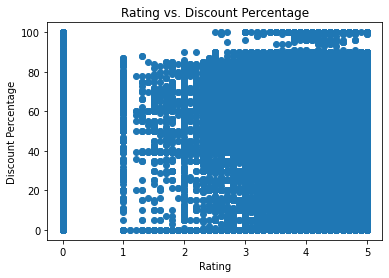

In [62]:
correlation = df['rating'].corr(df['discount'])
print("Correlation coefficient:", correlation)

plt.scatter(df['rating'], df['discount'])
plt.title('Rating vs. Discount Percentage')
plt.xlabel('Rating')
plt.ylabel('Discount Percentage')
plt.show()

The correlation coefficient between the rating and discount percentage is 0.048, which indicates a very weak positive correlation. This means that there is a slight tendency for products with higher ratings to have slightly higher discount percentages, but the relationship is not strong. Therefore, there is no significant or meaningful correlation between the rating of a product and the discount percentage offered. This indicates that there is a lack of variability or spread in the data, which can make it difficult to identify any clear pattern or correlation between the variables. In this case, the dense scatter plot suggests that there is no strong relationship between the rating and discount percentage, as most data points are concentrated around a specific range of values and do not show a distinct trend.

### 6.11 How is the distribution of discount column?

In [52]:
discount_percentages = df['discount']

mean_discount = discount_percentages.mean()
median_discount = discount_percentages.median()
std_discount = discount_percentages.std()

print("Mean Discount Percentage:", mean_discount)
print("Median Discount Percentage:", median_discount)
print("Standard Deviation of Discount Percentage:", std_discount)

Mean Discount Percentage: 39.30210392687948
Median Discount Percentage: 40.0
Standard Deviation of Discount Percentage: 26.161178084748588


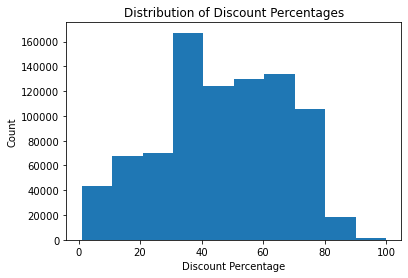

In [55]:
# Filter out rows with 0% discount
non_zero_discounts = df[df['discount'] != 0]['discount']

# Plot the distribution
plt.hist(non_zero_discounts, bins=10)
plt.title("Distribution of Discount Percentages")
plt.xlabel("Discount Percentage")
plt.ylabel("Count")
plt.show()


## INFERENCES

1. Product Ratings: The distribution of product ratings indicates that the majority of products have ratings between 3.5 and 4.5. This suggests that most products are generally well-received by customers. However, there are also a significant number of products with ratings below 3.5, indicating potential areas for improvement in product quality or customer satisfaction.

2. Price Variation: The analysis of price variation across different products reveals a wide range of prices. It is important to further investigate the factors influencing price differences, such as product features, brand reputation, or material quality. This information can be useful for pricing strategies, competitive analysis, and identifying pricing outliers that may require adjustment.

3. Correlation Analysis: The correlation analysis between price, rating, and discount reveals interesting insights. There is a weak negative correlation between price and rating, suggesting that higher-priced products may not always have higher ratings. Additionally, the correlation between rating and discount is very weak, indicating that the discount offered on a product is not significantly influenced by its rating.

Based on these findings, here are some general suggestions:

- Monitor and analyze customer reviews and feedback to identify areas for product improvement and customer satisfaction enhancement.
- Explore the factors contributing to price variations and consider adjusting pricing strategies accordingly.
- Consider offering targeted discounts or promotional offers based on factors other than product ratings alone, as the correlation between rating and discount is weak.
- Regularly update and maintain the dataset to ensure data integrity and accuracy for future analyses.
- Further investigate the outliers in the price and discount distribution to identify any anomalies or opportunities for optimization.